# Nice plots

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [25]:
df = pd.read_csv('hyp.csv',sep=';')
df

,0ч,4ч,24ч,7д,14д,30д,180д
мРНК ИЛ-1β,1,2.60,5.00,1.10,1.10,1.10,1.20
мРНК ФНОα,1,3.50,5.10,1.80,1.50,1.20,1.90
мРНК IBA-1,1,0.90,1.10,1.00,1.00,1.10,1.10
ДА,1,0.72,0.68,0.50,0.72,1.10,1.10
ДОФУК,1,1.00,0.83,0.98,0.87,0.98,1.20
ГВК,1,0.98,0.98,0.90,0.95,0.98,0.98
НА,1,2.00,2.10,3.50,3.85,1.10,1.20
мРНК кальпастатин,1,0.80,1.20,1.10,0.90,0.20,1.00
мРНК µ-кальпаин,1,1.10,1.60,2.40,1.30,1.00,2.30
мРНК m-кальпаин,1,0.80,1.00,1.50,1.10,1.10,1.30


## Simple Heatmaps

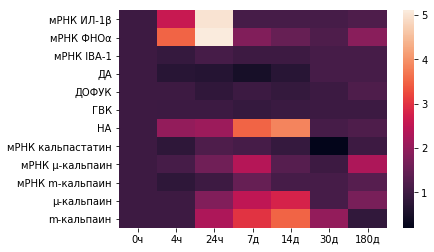

In [12]:
sns.heatmap(df)

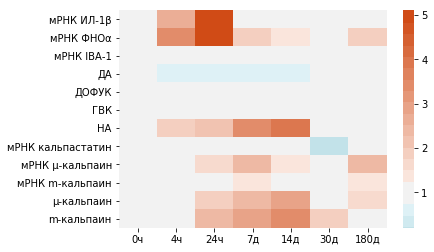

In [106]:
ax = sns.heatmap(
    df, 
    vmin=df.values.min(), vmax=df.values.max(), center=1,
    cmap=sns.diverging_palette(220, 20, n=len(np.unique(df.values)), s=95)
)

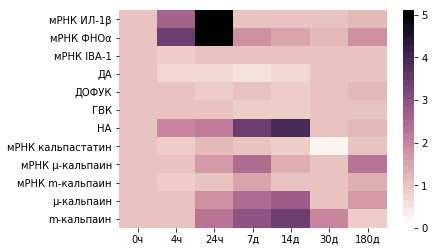

In [108]:
ax = sns.heatmap(
    df, 
    vmin=0, vmax=df.values.max(),
    cmap=sns.cubehelix_palette(dark=0, light=1,n_colors=len(np.unique(df.values))))

## Not simple Heatmaps

In [114]:
def value_to_color(val):
    palette = sns.diverging_palette(220, 20, n=256) # Create the palette
    color_min, color_max = [0, 5.1]
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y,v, size=None, grid=True):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    if size is not None:
        size_scale = 80
        ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=v.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s')
    else:
        ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=100,
        c=v.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s')
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    if grid:
        ax.grid(False, 'major')
        ax.grid(True, 'minor')
        ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
        ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
        ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
        ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    

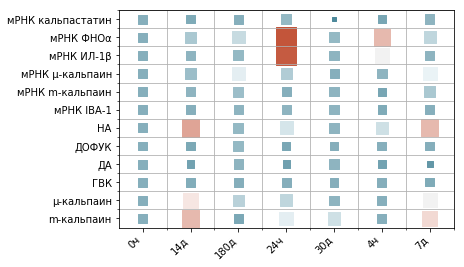

In [110]:
df_melt = pd.melt(df.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
df_melt.columns = ['x', 'y', 'value']
heatmap(x=df_melt['y'], y=df_melt['x'], v=df_melt['value'], size=df_melt['value'].abs())

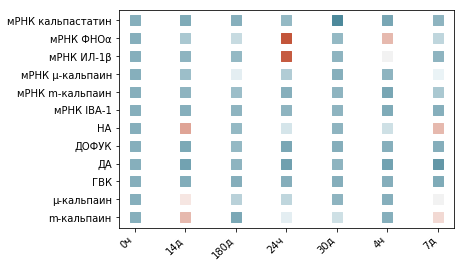

In [115]:
heatmap(x=df_melt['y'], y=df_melt['x'], v=df_melt['value'], grid=False)